## Q1)

In [1]:
import statistics

import numpy.linalg
import pandas as pd
import numpy as np

file="Lab Session Data.xlsx"
df=pd.read_excel(file,sheet_name="Purchase data")
a=df[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']].values
c=df[['Payment (Rs)']].values

print("dimensionality is 3")
num_vectors=a.shape[0]
print(f"Number of vectors:{num_vectors}")
rank=np.linalg.matrix_rank(a)
print(f"Rank of A: {rank}")
x=numpy.linalg.pinv(a)@c
print(f"the pseudo-inverse is {x}")


dimensionality is 3
Number of vectors:10
Rank of A: 3
the pseudo-inverse is [[ 1.]
 [55.]
 [18.]]


## Q2)

In [2]:
import numpy.linalg
import pandas as pd

file="Lab Session Data.xlsx"
df=pd.read_excel(file,sheet_name="Purchase data")
c=df[['Payment (Rs)']].values
d = []
for payment in c:
    if payment > 200:
        d.append("rich")
    else:
        d.append("poor")
print(d)

['rich', 'rich', 'rich', 'poor', 'rich', 'poor', 'rich', 'rich', 'poor', 'poor']


## Q3)

In [3]:
import pandas as pd
import statistics

file="Lab Session Data.xlsx"
df=pd.read_excel(file,sheet_name="IRCTC Stock Price")
d=df['Price'].values
mean=statistics.mean(d)
var=statistics.variance(d)
print(f"mean is {mean} and variance is {var}")
mean_wed = statistics.mean(df[df['Day'] == 'Wed']['Price'])
mean_apr = statistics.mean(df[df['Month'] == 'Apr']['Price'])
prob_loss = (df['Chg%'] < 0).mean()
prob_profit_wed = ((df['Chg%'] > 0) & (df['Day'] == 'Wed')).sum() / (df['Day'] =='Wed').sum()
print("Mean Price on Wednesdays:", round(mean_wed, 2))
print("Mean Price in April:", round(mean_apr, 2))
print("Probability of Loss:", round(prob_loss, 4))
print("Probability of Profit on Wednesday:", round(prob_profit_wed, 4))

mean is 1560.663453815261 and variance is 58732.365352539186
Mean Price on Wednesdays: 1550.71
Mean Price in April: 1698.95
Probability of Loss: 0.498
Probability of Profit on Wednesday: 0.42


## Q4)

In [4]:
import numpy as np

file="Lab Session Data.xlsx"

thyroid_df = pd.read_excel(file, sheet_name='thyroid0387_UCI')
desc = thyroid_df.describe(include='all')
missing = thyroid_df.isnull().sum()
print("\nData Types:\n", thyroid_df.dtypes)
print("\nMissing Values:\n", missing)
print("\nUnique Values per Column:\n", thyroid_df.nunique())
print("\nDescriptive Statistics:\n", desc)

categorical_cols = thyroid_df.select_dtypes(include='object').columns.tolist()
print("\nCategorical Columns:", categorical_cols)

print("\nChecking for outliers (Q1 - 1.5*IQR, Q3 + 1.5*IQR):")
for col in thyroid_df.select_dtypes(include=np.number).columns:
    Q1 = thyroid_df[col].quantile(0.25)
    Q3 = thyroid_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = thyroid_df[(thyroid_df[col] < Q1 - 1.5 * IQR) | (thyroid_df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")

print("\nMean and Variance for Numeric Columns:")
for col in thyroid_df.select_dtypes(include=np.number).columns:
    mean = thyroid_df[col].mean()
    var = thyroid_df[col].var()
    print(f"{col}: Mean = {mean:.2f}, Variance = {var:.2f}")



Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured  

## Q5)

In [5]:
from sklearn.preprocessing import LabelEncoder

df_encoded = thyroid_df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

binary_df = df_encoded.loc[:, df_encoded.nunique() == 2]
vec1 = binary_df.iloc[0].to_numpy()
vec2 = binary_df.iloc[1].to_numpy()

def jaccard_smc(v1, v2):
    f11 = np.sum((v1 == 1) & (v2 == 1))
    f00 = np.sum((v1 == 0) & (v2 == 0))
    f10 = np.sum((v1 == 1) & (v2 == 0))
    f01 = np.sum((v1 == 0) & (v2 == 1))

    jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
    smc = (f11 + f00) / (f11 + f00 + f10 + f01) if (f11 + f00 + f10 + f01) != 0 else 0
    return jc, smc
jc, smc = jaccard_smc(vec1, vec2)

print(f"Jaccard Coefficient (JC): {jc:.4f}")
print(f"Simple Matching Coefficient (SMC): {smc:.4f}")

Jaccard Coefficient (JC): 0.2500
Simple Matching Coefficient (SMC): 0.8500


## Q6)

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

vec1 = df_encoded.iloc[0].to_numpy().reshape(1, -1)
vec2 = df_encoded.iloc[1].to_numpy().reshape(1, -1)
cos_sim = cosine_similarity(vec1, vec2)[0][0]
print(f"Cosine Similarity: {cos_sim:.4f}")

Cosine Similarity: 1.0000


## Q7)

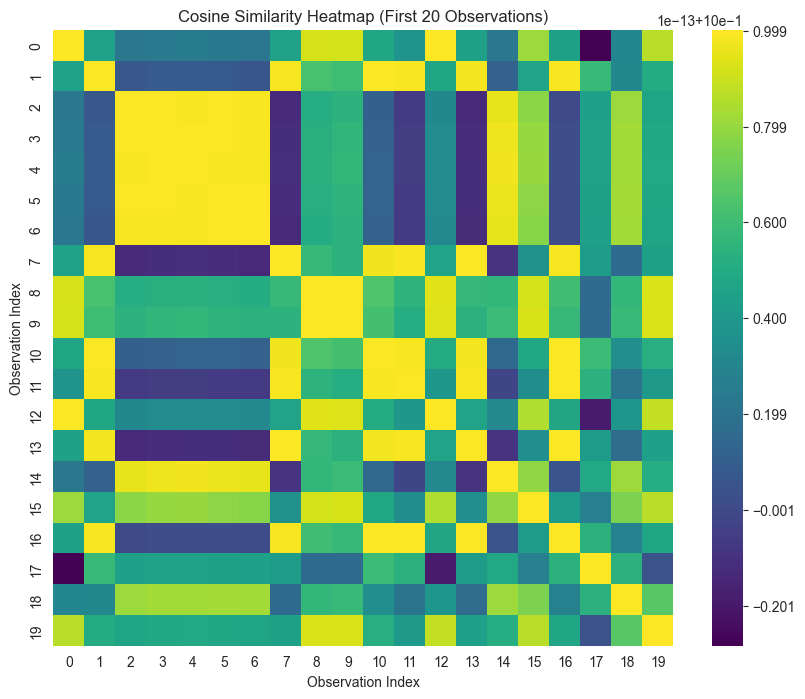

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

first_20 = df_encoded.iloc[:20]
cos_sim_matrix = cosine_similarity(first_20)
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix, annot=False, cmap='viridis')
plt.title("Cosine Similarity Heatmap (First 20 Observations)")
plt.xlabel("Observation Index")
plt.ylabel("Observation Index")
plt.show()

## Q8)

In [8]:
def impute_missing(df):
    for col in df.columns:
        if df[col].isnull().sum() == len(df[col]):
            print(f"Column '{col}' has all missing values ")
            continue

        if df[col].dtype == 'object':
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"Column '{col}' is categorical → filled missing values with mode: {mode_value}")

        elif df[col].dtype in ['int64', 'float64']:
            if df[col].nunique() < 10:
                median_value = df[col].median()
                df[col].fillna(median_value, inplace=True)
                print(f"Column '{col}' is numeric (likely with outliers) → filled missing values with median: {median_value}")
            else:
                mean_value = df[col].mean()
                df[col].fillna(mean_value, inplace=True)
                print(f"Column '{col}' is numeric without outliers → filled missing values with mean: {mean_value}")
    return

df_cleaned = impute_missing(df)

Column 'Date' is categorical → filled missing values with mode: Apr 01, 2021
Column 'Month' is categorical → filled missing values with mode: Jul
Column 'Day' is categorical → filled missing values with mode: Tue
Column 'Price' is numeric without outliers → filled missing values with mean: 1560.6634538152612
Column 'Open' is numeric without outliers → filled missing values with mean: 1560.9654618473896
Column 'High' is numeric without outliers → filled missing values with mean: 1586.1305220883535
Column 'Low' is numeric without outliers → filled missing values with mean: 1538.7427710843374
Column 'Volume' is categorical → filled missing values with mode: 1.16M
Column 'Chg%' is numeric without outliers → filled missing values with mean: 0.0019642570281124495


C:\Users\sudha\AppData\Local\Temp\ipykernel_32188\642484768.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
C:\Users\sudha\AppData\Local\Temp\ipykernel_32188\642484768.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

## Q9)

In [10]:
from sklearn.preprocessing import MinMaxScaler


def normalize_columns(df, columns):
    scaler = MinMaxScaler()
    print("Normalizing the following columns:")
    for col in columns:
        print(f"→ Column '{col}' scaled using Min-Max Scaling.")
    df[columns] = scaler.fit_transform(df[columns])
    return df


numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_normalized = normalize_columns(df_encoded.copy(), numeric_cols)

Normalizing the following columns:
→ Column 'Record ID' scaled using Min-Max Scaling.
→ Column 'age' scaled using Min-Max Scaling.
→ Column 'sex' scaled using Min-Max Scaling.
→ Column 'on thyroxine' scaled using Min-Max Scaling.
→ Column 'query on thyroxine' scaled using Min-Max Scaling.
→ Column 'on antithyroid medication' scaled using Min-Max Scaling.
→ Column 'sick' scaled using Min-Max Scaling.
→ Column 'pregnant' scaled using Min-Max Scaling.
→ Column 'thyroid surgery' scaled using Min-Max Scaling.
→ Column 'I131 treatment' scaled using Min-Max Scaling.
→ Column 'query hypothyroid' scaled using Min-Max Scaling.
→ Column 'query hyperthyroid' scaled using Min-Max Scaling.
→ Column 'lithium' scaled using Min-Max Scaling.
→ Column 'goitre' scaled using Min-Max Scaling.
→ Column 'tumor' scaled using Min-Max Scaling.
→ Column 'hypopituitary' scaled using Min-Max Scaling.
→ Column 'psych' scaled using Min-Max Scaling.
→ Column 'TSH measured' scaled using Min-Max Scaling.
→ Column 'TSH' 